## Objetivo del proyecto

Mi proyecto de Machine learning pretende responder a la siguiente demanda hipotética:

*“El alcalde un pueblo de Castilla y León está preocupado por las continuas intoxicaciones que sufren los vecinos del pueblo y, especialmente, los turistas, debido a la ingestión de las setas silvestres que recogen del campo. Nos pide que tratemos de identificar las características de las setas que, con gran acierto, permitan distinguir una seta venenosa de una comestible. Con esas características desea elaborar un folleto que ayude a los ciudadanos a identificar adecuadamente los dos tipos de setas, por lo que insiste en que seleccionemos únicamente unas pocas de las características más relevantes”.*

Traducido a nuestro trabajo, vamos a **seleccionar las features más importantes** y a buscar un **modelo supervisado de clasificación** que nos permita lograr un **buen recall**. 

## Análisis exploratorio, limpieza y preprocesado de los datos

#### Importo las librerías que voy a necesitar en este proyecto

In [1]:
#Para trabajar con mis DataFrames y codificar numéricamente mis features
import pandas as pd

#Para la creación de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Para calcular el número de filas necesarias para 
#representar los gráficos
import math 

#Para la codificación numérica de mi target
from sklearn import preprocessing

#Para separar en train y test, y para la validación cruzada
from sklearn.model_selection import train_test_split, KFold, cross_val_score

#Para la regresión logística
from sklearn.linear_model import LogisticRegression

#Para el knn
from sklearn.neighbors import KNeighborsClassifier

#Para el svm de clasificación
from sklearn.svm import SVC

#Para el RandomForest de clasificación
from sklearn.ensemble import RandomForestClassifier

#Para obtener la métrica recall
from sklearn.metrics import recall_score

#Para obtener la matriz de correlación de Phik
from phik import phik_matrix

#Fijo el máximo de filas a mostrar a 100 y el de columnas, a 50
pd.options.display.max_rows = 120
pd.options.display.max_columns = 50

### Importo el DataFrame que voy a utilizar: Mushroom

Extraído de https://www.kaggle.com/datasets/uciml/mushroom-classification. Para interpretar las categorías de las variables, recomendamos acudir a la fuente original, UCI Machine Learning Repository, en https://archive.ics.uci.edu/dataset/73/mushroom

In [2]:
df_mushroom =  pd.read_csv("../data/mushrooms.csv")

df_mushroom

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0               c         n          k           e          e   
1               c         b          k           e          c   
2               c         b          n           e          c   
3               c         n          n           e          e   
4               w         b          k           t          e   
...           ...       ...        ...         ...        ...   
8119            c         b          y           e          ?   
8120            c         b          y           e          ?   
8121            c         b          n           e          ?   
8122            c         n          b           t          ?   
8123            c         b          y           e          ?   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                           s                        s                      w   
1                           s                        s                      w   
2                           s                        s                      w   
3                           s                        s                      w   
4                           s                        s                      w   
...                       ...                      ...                    ...   
8119                        s                        s                      o   
8120                        s                        s                      o   
8121                        s                        s                      o   
8122                        s                        k                      w   
8123                        s                        s                      o   

     stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                         w         p          w           o         p   
1                         w         p          w           o         p   
2                         w         p          w           o         p   
3                         w         p          w           o         p   
4                         w         p          w           o         e   
...                     ...       ...        ...         ...       ...   
8119                      o         p          o           o         p   
8120                      o         p          n           o         p   
8121                      o         p          o           o         p   
8122                      w         p          w           o         e   
8123                      o         p          o           o         p   

     spore-print-color population habitat  
0                    k          s       u  
1                    n          n       g  
2                    n          n       m  
3                    k          s       u  
4                    n          a       g  
...                ...        ...     ...  
8119                 b          c       l  
8120                 b          v       l  
8121                 b          c       l  
8122                 

### Exploro el tipo de mis variables y posibles missings

In [3]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Veo que tengo un target categórico ('class', si la seta es comestible o no) y 22 features categóricas (relacionadas principalmente con el sombrero de la seta, sus láminas, esporas, pie, olor, anillo, velo, olor y habitat). Tengo 8124 observaciones diferentes de setas.

La única variable donde tengo **valores nulos** es stalk-root: 5644 non-null y 2480 missings. Es decir, en esa columna **me faltan el 43.9% de los datos**. Dado el alto número de valores faltantes, cercano a la mitad de los datos, en lugar de imputar esos missings, decido eliminar directamente esa columna.

In [4]:
df_mushroom.drop('stalk-root', axis = 1, inplace = True)

df_mushroom.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-surface-above-ring  \
0            c         n          k           e                        s   
1            c         b          k           e                        s   
2            c         b          n           e                        s   
3            c         n          n           e                        s   
4            w         b          k           t                        s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w                      w   
1                        s                      w                      w   
2                        s                      w                      w   
3                        s                      w                      w   
4                        s                      w                      w   

  veil-type veil-color ring-number ring-type spore-print-color population  \
0         p          w           o         p                 k          s   
1         p          w           o         p                 n          n   
2         p          w           o         p                 n          n   
3         p          w           o         p                 k          s   
4         p          w           o         e                 n          a   

  habitat  
0       u  
1       g  
2       m  
3       u  
4       g

### Identifico columnas irrelevantes, que aportan poca información

In [5]:
df_mushroom.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [6]:
df_mushroom['veil-type'].value_counts()

veil-type
p    8124
Name: count, dtype: int64

Como la variable veil-type tiene **un único valor para todas las setas** (un velo parcial), sean estas comestibles o venenosas, decidimos eliminarla porque **no aporta información relevante**.

In [7]:
df_mushroom.drop('veil-type', axis = 1, inplace = True)

df_mushroom.head() #Ahora solo tengo 20 features

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-surface-above-ring  \
0            c         n          k           e                        s   
1            c         b          k           e                        s   
2            c         b          n           e                        s   
3            c         n          n           e                        s   
4            w         b          k           t                        s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w                      w   
1                        s                      w                      w   
2                        s                      w                      w   
3                        s                      w                      w   
4                        s                      w                      w   

  veil-color ring-number ring-type spore-print-color population habitat  
0          w           o         p                 k          s       u  
1          w           o         p                 n          n       g  
2          w           o         p                 n          n       m  
3          w           o         p                 k          s       u  
4          w           o         e                 n          a       g

### Exploro potenciales duplicados

Veo que no hay ninguna fila duplicada.

In [8]:
df_mushroom.duplicated().sum() 

0

### Representación gráfica: diagramas de barras

Creo un **diagrama de barras con cada una de las columnas**, para observar la distribución de las dos clases del target (setas comestibles vs venenosas) en las categorías de dichas columnas.

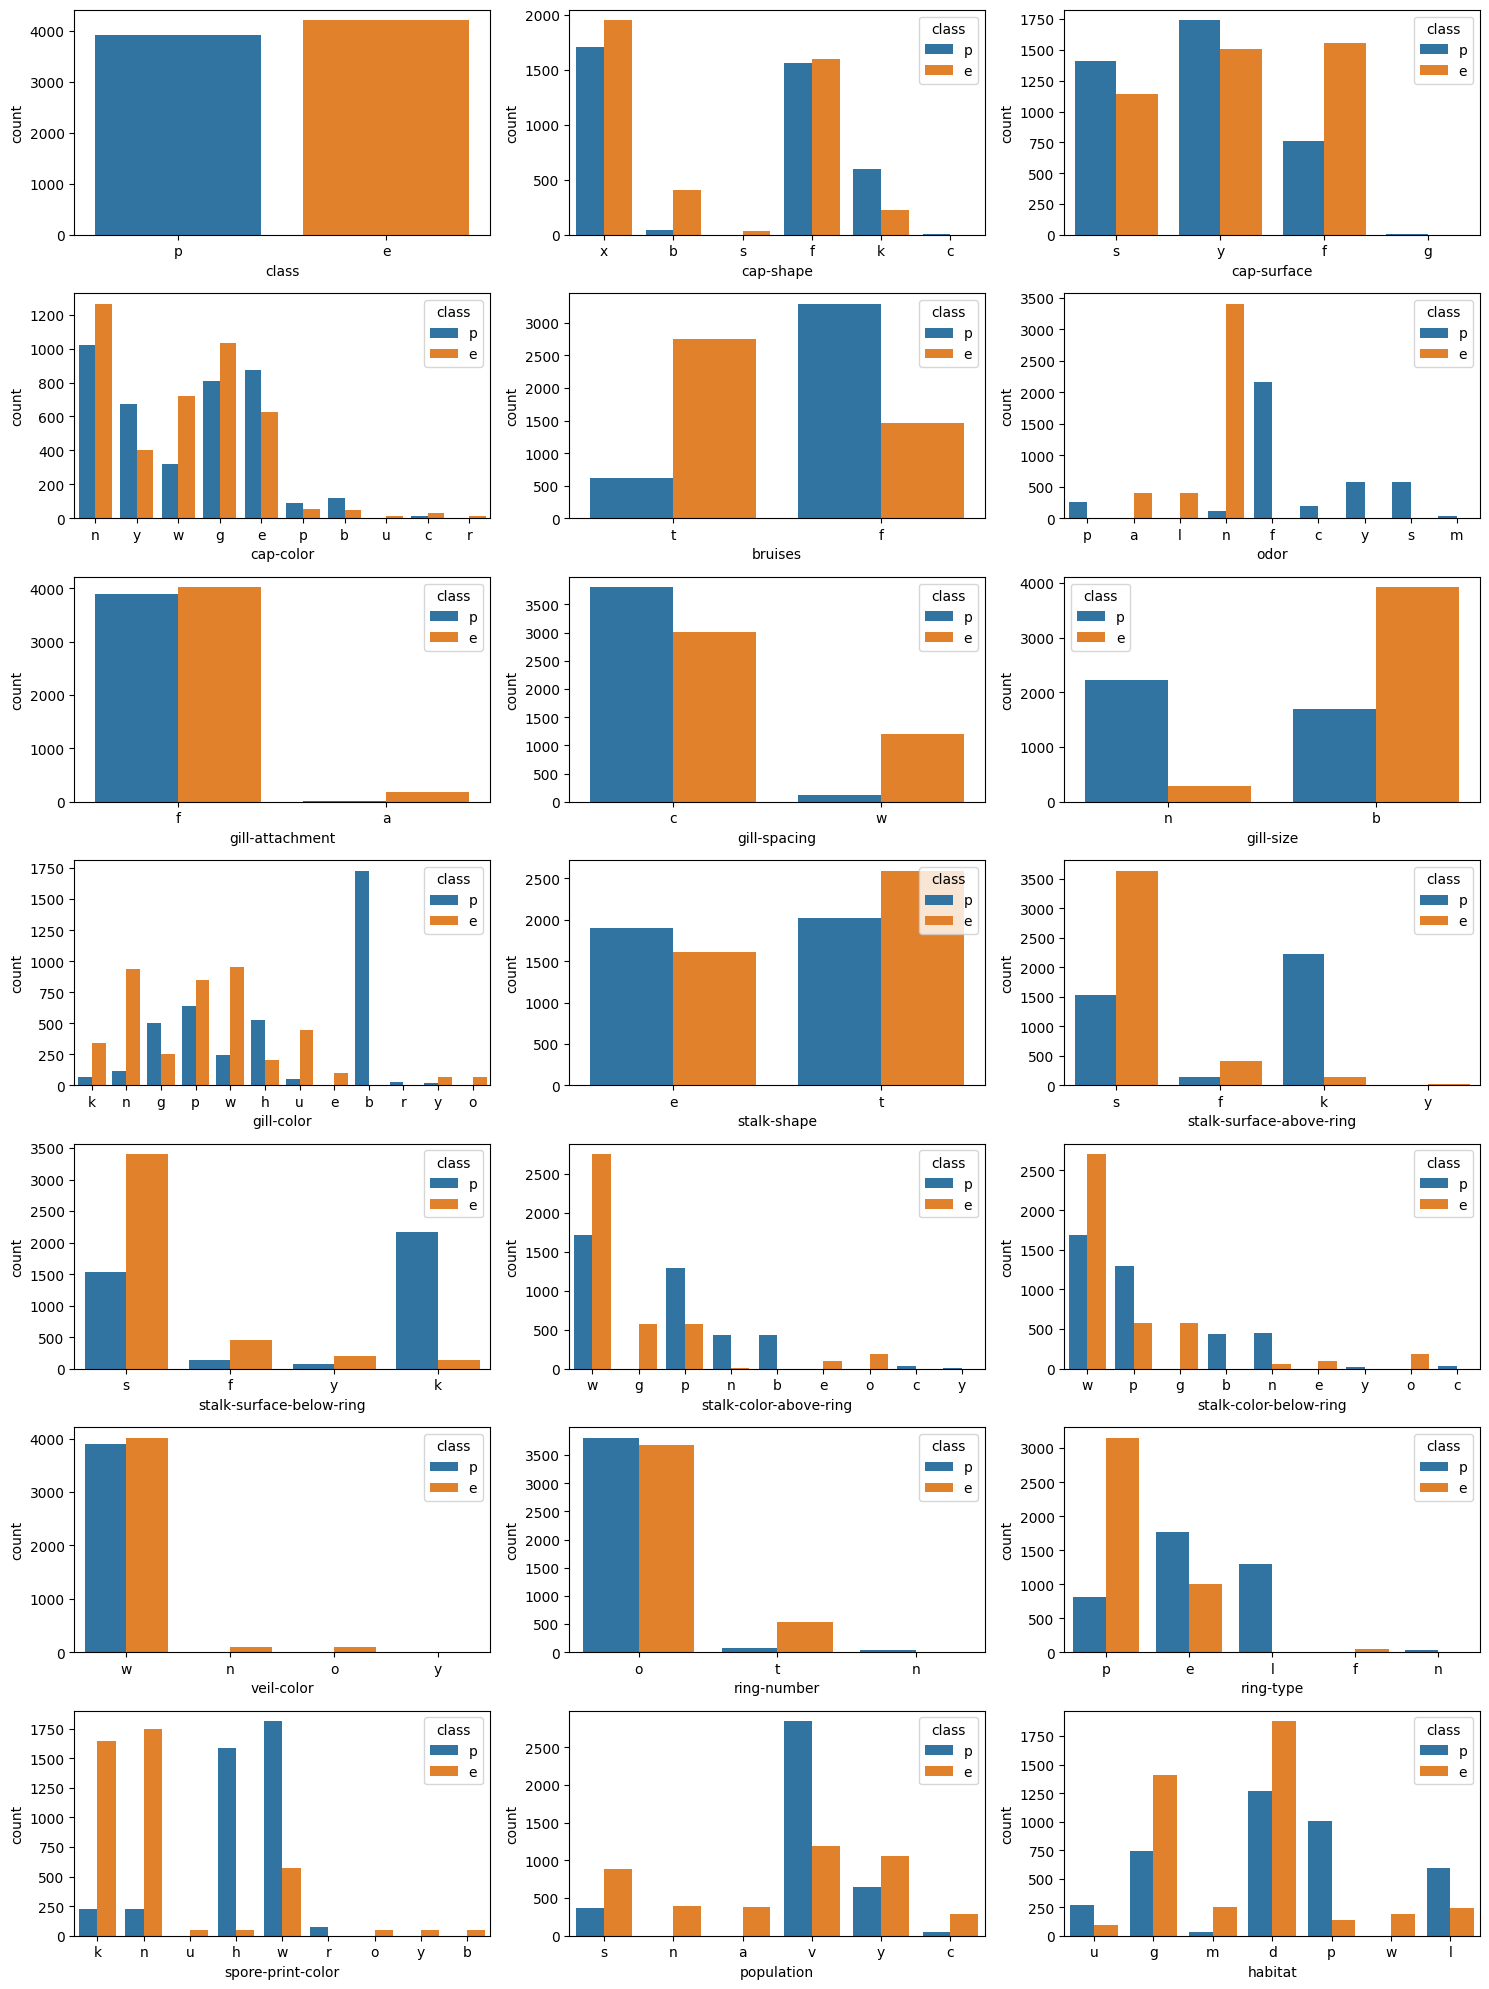

In [9]:
#Quiero 3 gráficos por fila, para que se puedan apreciar bien; y calculo
    #el número de filas necesarias para poder representarlos todos
graf_max_fila = 3
num_filas = math.ceil(len(df_mushroom.columns) / graf_max_fila)

#Creo la figura y los axes
fig, axs = plt.subplots(nrows = num_filas, ncols = graf_max_fila, figsize = (15, 20))

#Hago un bucle para dibujar los gráficos de barras
for index, feature in enumerate(df_mushroom.columns):

    #Calculo la fila y la columna donde se debe situar cada gráfico
    nfila = math.floor(index / graf_max_fila) 
    ncolumna = index % graf_max_fila

    #Defino las características de cada gráfico
    sns.countplot(data = df_mushroom, x = feature, hue = 'class', ax = axs[nfila][ncolumna])

    #Para que me meta un espaciado entre las gráficas
    plt.tight_layout() 

Algunas observaciones que podemos extraer a partir de estas gráficas:

0) **class**: Las clases del target, venenosas (p) vs comestibles (e), están más o menos balanceadas, por lo que no necesitaré hacer ninguna operación de balanceado al respecto.

1) **cap-shape**: Las formas más comunes de sombrero son convexa (x) y plana (f), sin que se observen diferencias a simple vista entre las setas venenosas (en azul) y las comestibles (en naranja).

2) **cap-surface**: La superficie del sombrero suele ser lisa (s), escamosa (y) o fibrosa (f), pero no suele presentar surcos (g). Es menos común que las setas venosas sean fibrosas, pero probablemente no sean diferencias significativas.

3) **cap-color**: Los colores más típicos del sombrero son el marrón(n), amarillo (y), blanco (w), gris (g) y rojo (e). No hay diferencias claras a simple vista entre las setas comestibles y venenosas.

4) **bruises**: Es más común que las setas venenosas no tengan moretones, y que las comestibles sí los tengan.

5) **odor**: A simple vista parece una variable que diferencia bastante bien entre setas venosas y comestibles, ya que las primeras o bien no tienen olor (n), o bien tienen un olor punzante(p), a creosota (c), a pescado (y), picante (s), mohoso (m), y principalmente fétido (f); mientras que el olor de las setas comestibles puede ser almendrado (a) o anisado (l), si bien mayoritariamente no tienen ningún olor (n).

6) **gill-attachment**: Esta variable se refiere a la unión de las láminas con el pie. Tanto en las setas venenosas como en las comestibles, lo más frecuente es una unión libre (f), donde las láminas no están unidas al pie y se extienden horizontalmente sin tocarlo.

7) **gill-spacing**: En general, es más común que las láminas, en ambos tipos de setas, estén cercanas o próximas entre sí (c), si bien en algunas setas comestibles las láminas pueden estar muy apretadas entre sí (w).

8) **gill-size**: El ancho de las láminas en las setas comestibles suele ser ancho (b), y las setas venenosas tienen láminas tanto anchas como estrechas.

9) **gill-color**: El color de las láminas es muy variable; quizás lo más notable sea que las setas venenosas generalmente tienen láminas de color ocre (b).

10) **stalk-shape**: A priori no se ven diferencias entre setas venenosas y comestibles: ambas pueden tener tanto tallos que tiendan a ensacharse (e) como tallos que tienden a estrecharse (t), a medida que los recorremos en el eje vertical.

11) **stalk-surface-above-ring**: En las comestibles la superficie del tallo por encima del anillo suele ser principalmente lisa, sin imperfecciones (s), mientras que en las venenosas, puede ser tanto lisa (s) como suave al tacto (k).

12) **stalk-surface-below-ring**: Se observa lo mismo que en la variable anterior, pero en este caso en lo referente al tallo por debajo del anillo.

13) **stalk-color-above-ring**: El color del tallo por encima del anillo es muy variable; siendo más comunes los tallos de color blanco (w), especialmente en las setas comestibles.

14) **stalk-color-below-ring**: Se observa lo mismo que en la variable anterior, pero en este caso en lo referente al tallo por debajo del anillo.

15) **veil-color**: El color más común de velo es el blanco (w), en ambos tipos de setas.

16) **ring-number**: Ambas setas suelen tener solo un anillo (o).

17) **ring-type**: Los anillos más comunes son los colgantes (p), evanescentes (e) y grandes (l), si bien estos últimos solo aparecen en las setas venenosas.

18) **spore-print-color**: Se observan diferencias entre setas comestibles y venenosas, de modo que las primeras suelen tener esporas de color negro (k) o marrón (n); y las venenosas, color chocolate (h) o blanco (w).

19) **population**: La distribución de las poblaciones en setas comestibles es muy variada, si bien las venenosas suelen aparecen en grupos de varias setas juntas (v).

20) **habitat**: Las setas comestibles generalmente se encuentran localizadas en pastos (g) y bosques (d), mientras que las venenosas tienen hábitats más dispares, encontrándose tanto en bosques (d), como en senderos (p), pastos (p) y hojas (l).

A simple vista, pensamos que *las características que mejor nos permitirán diferenciar entre setas comestibles y venenosas serán si la superficie del sombrero es fibrosa o no, si la seta tiene o no moretones, si tiene un olor fétido o inodoro, si las láminas están muy apretadas entre sí o no, si son estrechas o no, y si son de color ocre o no, si el tallo por encima y/o por debajo del anillo es suave al tacto y/o blanco, si el anillo es grande o no, el color de las esporas (negro, marrón, chocolate o blanco), el hábitat de las setas (pastos, senderos vs hojas) y si suelen aparecer en agrupaciones de varias setas o aisladas*. Veremos más adelante si estamos en lo cierto.


### Encoding numérico de las variables categóricas

Primero realizo el enconding numérico con las features. Opto por el método OneHotEncoder porque mis variables son nominales (no ordinales) y porque quiero contar con todas las columnas (no tirar necesiamente una feature de cada variable) para poder seleccionar aquellas más importantes.

In [10]:
X = pd.get_dummies(df_mushroom.iloc[:, 1:])

X   #Ahora mi X pasa de tener 20 features a 111 tras el OneHotEncoder

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0           False        False        False        False        False   
1           False        False        False        False        False   
2            True        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
8119        False        False        False         True        False   
8120        False        False        False        False        False   
8121        False        False         True        False        False   
8122        False        False        False         True        False   
8123        False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            True          False          False           True          False   
1            True          False          False           True          False   
2           False          False          False           True          False   
3            True          False          False          False           True   
4            True          False          False           True          False   
...           ...            ...            ...            ...            ...   
8119        False          False          False           True          False   
8120         True          False          False           True          False   
8121        False          False          False           True          False   
8122        False          False          False          False           True   
8123         True          False          False           True          False   

      cap-color_b  cap-color_c  cap-color_e  cap-color_g  cap-color_n  \
0           False        False        False        False         True   
1           False        False        False        False        False   
2           False        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False         True        False   
...           ...          ...          ...          ...          ...   
8119        False        False        False        False         True   
8120        False        False        False        False         True   
8121        False        False        False        False         True   
8122        False        False        False        False         True   
8123        False        False        False        False         True   

      cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  \
0           False        False        False        False        False   
1           False        False        False        False         True   
2           False        False        False         True        False   
3           False        False        False         True        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
8119        False        False        False        False        False   
8120        False        False        False        False        False   
8121        False        False        False        False        False   
8122        False        False        False        False        False   
8123        False        False        False        False        False   

      bruises_f  bruises_t  odor_a  odor_c  odor_f  ...  ring-type_l  \
0         False       True   False   False   False  ...        False   
1         False       True    True   False   False  ...        False   
2         False       True   False   False   False  ...        False   
3         False       True   False   False   False  ...        False   
4          True      False   False   False

Después realizo el enconding numérico de mi target, en este caso utilizando Label Encoder

In [11]:
#Miro la distribución deL target
df_mushroom['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [12]:
#Convierto en numéricos los valores de la y
le = preprocessing.LabelEncoder()
df_mushroom['class'] = le.fit_transform(df_mushroom['class'])

#Compruebo que la conversión se ha realizado correctamente.
df_mushroom['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

En mi target ahora las setas comestibles (e) pasan a ser la categoría 0, y las setas venenosas (p) serán la categoría 1

### Elimino una columna de cada variable dicotómica, tras OneHotEncoder

Para evitar tener información duplicada en las features, elimino una de las dos columnas en las que se han divido las variables dicotómicas tras el OneHotEncoder, ya que ambas estarían aportando la misma información. Por ejemplo, bruises_t o "¿sí tiene moretones?" (False vs True) sería lo mismo que bruises_f o "¿no tiene moretones?" (True vs False), respectivamente.

In [13]:
#Identifico las variables dicotómicas de mi dataset original (df_mushroom)
col_eliminar = df_mushroom.nunique()[df_mushroom.nunique() == 2].index.to_list()

#Y busco las columnas a las que han dado lugar tras el OneHotEncoder en X 
for feature in X.columns:
    for columna in col_eliminar:
        if feature.startswith(columna):
            print(feature)

bruises_f
bruises_t
gill-attachment_a
gill-attachment_f
gill-spacing_c
gill-spacing_w
gill-size_b
gill-size_n
stalk-shape_e
stalk-shape_t


In [14]:
#Ahora, de mi X elimino la última columna de esas variables originalmente 
#binarias, de modo que me quedo únicamente con 106 columnas

X.drop(['bruises_t', 'gill-attachment_f', 'gill-spacing_w', 'gill-size_n', 'stalk-shape_t'], axis = 1, inplace = True)

X.head()

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        False        False        False        False        False   
1        False        False        False        False        False   
2         True        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0         True          False          False           True          False   
1         True          False          False           True          False   
2        False          False          False           True          False   
3         True          False          False          False           True   
4         True          False          False           True          False   

   cap-color_b  cap-color_c  cap-color_e  cap-color_g  cap-color_n  \
0        False        False        False        False         True   
1        False        False        False        False        False   
2        False        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False         True        False   

   cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  bruises_f  \
0        False        False        False        False        False      False   
1        False        False        False        False         True      False   
2        False        False        False         True        False      False   
3        False        False        False         True        False      False   
4        False        False        False        False        False       True   

   odor_a  odor_c  odor_f  odor_l  ...  ring-type_l  ring-type_n  ring-type_p  \
0   False   False   False   False  ...        False        False         True   
1    True   False   False   False  ...        False        False         True   
2   False   False   False    True  ...        False        False         True   
3   False   False   False   False  ...        False        False         True   
4   False   False   False   False  ...        False        False        False   

   spore-print-color_b  spore-print-color_h  spore-print-color_k  \
0                False                False                 True   
1                False                False                False   
2                False                False                False   
3                False                False                 True   
4                False                False                False   

   spore-print-color_n  spore-print-color_o  spore-print-color_r  \
0                False                False                False   
1                 True                False                False   
2                 True                False                False   
3                False                False                False   
4                 True                False                False   

   spore-print-color_u  spore-print-color_w  spore-print-color_y  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   population_a  population_c  population_n  population_s  population_v  \
0         False         False         False          True         False   
1         False         False          True         False         False   
2         False         False          True         False         False   
3         False         False         False          True         False   
4          True         False         False         False         False   

   population_y  habitat_d  habitat_g  h

Guardo una copia en local de mi DataFrame ya limpio, con 106 variables. Esta copia nos será útil en el último Notebook (extra)

In [15]:
df_mushroom_largo = pd.concat([X, df_mushroom['class']], axis = 1)

df_mushroom_largo.to_csv(f'../data/df_mushroom_largo.csv', sep=',', index=False, encoding='utf-8')

## Pruebo mis cuatro modelos con todas las variables

Antes de eliminar variables de mi dataset acorde a su mayor/menor importancia en la clasificación, quiero tantear el desempeño de **cuatro modelos supervisados diferentes** *(logistic regression, k-nearest neighbor (knn), support vector machine (svm) y random forest)*, usando los hiperparámetros por defecto y todo mi dataset, esto es, **con las 106 features y el target**; si bien mi objetivo último es quedarme únicamente con unas pocas features y encontrar un modelo que clasifique muy bien.

Como medida de score, analizaré la **sensibilidad o recall**, ya que me interesa que mi modelo no cometa falsos negativos (i.e. cuando clasifica erróneamente a los 1 como 0), es decir, que no clasifique una seta como comestible cuando en realidad es venenosa.

### División en train/test

En primer lugar, divido mis datos en train y test.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    df_mushroom['class'], 
                                                    test_size = 0.2, #Reservo un 20% de los datos para test
                                                    random_state = 50) #Fijo la semilla por replicabilidad

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (6499, 106)
X_test: (1625, 106)
y_train: (6499,)
y_test: (1625,)


Compruebo la distribución de las clases del target (comestible vs venosa) tanto en train como en test, y veo que las clases están más o menos balanceadas, por lo que no se necesita realizar ninguna operación de balanceo al respecto.

In [17]:
y_train.value_counts()

class
0    3405
1    3094
Name: count, dtype: int64

In [18]:
y_test.value_counts()

class
1    822
0    803
Name: count, dtype: int64

### Sensibilidad en los cuatro modelos

Para cada modelo, hago una validación cruzada con 10 kfolds con los datos de train, obtengo la media y desviación típica de la sensibilidad en esos kfolds, y pongo a prueba mi modelo con los datos en test. A continuación muestro una tabla con toda esta información.

In [19]:
#REGRESIÓN LOGÍSTICA

#Defino el número de kfolds que quiero
kfold = KFold(n_splits = 10, shuffle = True, random_state = 35)  

#Instancio mi modelo de regresión logística
log_reg = LogisticRegression()

#Realizo la validación cruzada con los datos de train y 10 kfolds
log_reg_score_train = cross_val_score(estimator = log_reg, 
                                        X = X_train, 
                                        y = y_train, 
                                        cv = kfold, 
                                        scoring = ("recall"))

#Ahora testeo mi modelo de regresión logística con los datos de test
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg_score_test = recall_score(y_test, y_pred)

In [20]:
#KNN

kfold = KFold(n_splits = 10, shuffle = True, random_state = 26)  
knn = KNeighborsClassifier()

knn_score_train = cross_val_score(estimator = knn, 
                                    X = X_train, 
                                    y = y_train, 
                                    cv = kfold, 
                                    scoring = ("recall"))

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_score_test = recall_score(y_test, y_pred)

In [21]:
#SCV

kfold = KFold(n_splits = 10, shuffle = True, random_state = 31)  
svc = SVC()

svc_score_train = cross_val_score(estimator = svc, 
                                    X = X_train, 
                                    y = y_train, 
                                    cv = kfold, 
                                    scoring = ("recall"))

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_score_test = recall_score(y_test, y_pred)

In [22]:
#RandomForestClassifier

kfold = KFold(n_splits = 10, shuffle = True, random_state = 23)  
random_forest = RandomForestClassifier(random_state = 94) 
#Fijo una semilla para reprodubilidad cuando calcule después feature_importances_

random_forest_score_train = cross_val_score(estimator = random_forest, 
                                            X = X_train, 
                                            y = y_train, 
                                            cv = kfold,
                                            scoring = ("recall"))

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest_score_test = recall_score(y_test, y_pred)

#### Tabla resumen del recall en los cuatro modelos, en train (CV) y test

In [23]:
modelos = ['Logistic Regression', 'knn', 'SVC', 'Random Forest Classifier']
train_mean = [log_reg_score_train.mean(), knn_score_train.mean(), svc_score_train.mean(), random_forest_score_train.mean()]
train_std = [log_reg_score_train.std(), knn_score_train.std(), svc_score_train.std(), random_forest_score_train.std()]
test = [log_reg_score_test, knn_score_test, svc_score_test, random_forest_score_test]

recall_default_table = pd.DataFrame({'Modelo': modelos, 'Media de recall en train': train_mean,
                                     'Desviación típica de recall en train': train_std, 'Recall en test': test}).set_index('Modelo')

recall_default_table

Media de recall en train  \
Modelo                                               
Logistic Regression                       0.998771   
knn                                       1.000000   
SVC                                       1.000000   
Random Forest Classifier                  1.000000   

                          Desviación típica de recall en train  Recall en test  
Modelo                                                                          
Logistic Regression                                   0.002026        0.998783  
knn                                                   0.000000        1.000000  
SVC                                                   0.000000        1.000000  
Random Forest Classifier                              0.000000        1.000000

## Selección de las features más importantes

Veo que en general cualquiera de los cuatro modelos es capaz de clasificar mi dataset en setas comestibles vs venenosas prácticamente con un 100% de acierto. Pero a mí no me interesa tener en cuenta 106 características. Nuestro objetivo es encontrar un modelo **que clasifique, con gran sensibilidad, usando solo unas pocas features**. Para ello, vamos a seleccionarlas basándonos en el **feature_importances_** del RandomForestClassifier, con los datos de train.

### features_importances_

Partiendo de mi RandomForestClassifier anterior, extraigo el features_importances_ (en %) de las columnas del dataset, y las ordeno dejando las más importantes en la parte superior.


In [24]:
feat_importance = pd.DataFrame({'features': X_train.columns, 
                                'feature importances': random_forest.feature_importances_}).set_index('features')*100

feat_importance_orden = feat_importance.sort_values(by = "feature importances", ascending = False)

feat_importance_orden

feature importances
features                                       
gill-size_b                            9.380543
odor_n                                 8.817495
gill-color_b                           7.535354
spore-print-color_h                    6.338769
odor_f                                 5.861566
stalk-surface-below-ring_k             5.408511
stalk-surface-above-ring_k             4.119893
ring-type_p                            3.756356
bruises_f                              3.719401
population_v                           3.430356
stalk-surface-above-ring_s             3.005004
ring-type_l                            2.964732
odor_p                                 2.070379
spore-print-color_w                    1.931693
gill-spacing_c                         1.817568
stalk-shape_e                          1.561883
spore-print-color_n                    1.548455
odor_c                                 1.290625
spore-print-color_k                    1.252703
habitat_u                              1.250953
ring-type_e                            1.104019
habitat_d                              1.099663
stalk-surface-below-ring_s             0.969930
ring-number_t                          0.928328
stalk-color-above-ring_w               0.870046
habitat_g                              0.831861
cap-surface_f                          0.786509
stalk-color-below-ring_w               0.754056
odor_a                                 0.741299
spore-print-color_r                    0.695961
population_s                           0.677702
odor_l                                 0.676795
ring-number_o                          0.668151
habitat_p                              0.651878
stalk-surface-below-ring_f             0.574565
cap-surface_s                          0.553003
odor_s                                 0.502237
cap-color_y                            0.494714
stalk-surface-above-ring_f             0.444471
gill-color_w                           0.441280
population_a                           0.386500
odor_y                                 0.386096
cap-color_w                            0.355772
population_y                           0.334217
habitat_m                              0.329957
population_n                           0.314690
stalk-color-below-ring_b               0.302063
stalk-surface-below-ring_y             0.296800
cap-color_n                            0.279333
cap-shape_b                            0.255267
cap-color_b                            0.247164
stalk-color-below-ring_o               0.226424
stalk-color-below-ring_p               0.225982
cap-surface_y                          0.221916
stalk-color-above-ring_n               0.202987
gill-color_r                           0.190824
gill-color_h                           0.188762
stalk-color-below-ring_n               0.187476
habitat_l                              0.167948
stalk-color-above-ring_p               0.166946
gill-color_n                           0.160841
stalk-color-above-ring_b               0.155140
cap-color_p                            0.154109
cap-color_e                            0.151993
habitat_w                              0.143345
odor_m                                 0.141793
population_c                           0.140807
cap-color_g                            0.133073
stalk-color-above-ring_g               0.130816
ring-type_f                            0.122582
ring-type_n                            0.121751
gill-attachment_a                      0.117482
cap-shape_x                            0.116652
gill-color_g                           0.110683
cap-shape_f                            0.105622
spore-print-color_u                    0.102035
stalk-color-above-ring_o               0.102012
stalk-color-above-ring_c               0.093769
gill-color_p                           0.074139
ring-number_n                          0.073963
gill-color_u                           0.065859
stalk-color-below-ring_g               0.064

Vemos que, a pesar de haber muchas features diferentes, solo unas pocas parecen ser realmente relevantes para el RandomForest de clasificación. Como mi objetivo era identificar un número reducido de características relevantes que plasmar en un folleto, dirigido a un público general, decido quedarme únicamente con las 11 primeras columnas (es decir, aquellas que contribuyen al menos un 3.0%).

In [25]:
#Indico el número de features que quiero para mi DataFrame final

num_ft_seleccionadas = 11

ft_seleccionadas = feat_importance_orden.iloc[:num_ft_seleccionadas]

ft_seleccionadas

feature importances
features                                       
gill-size_b                            9.380543
odor_n                                 8.817495
gill-color_b                           7.535354
spore-print-color_h                    6.338769
odor_f                                 5.861566
stalk-surface-below-ring_k             5.408511
stalk-surface-above-ring_k             4.119893
ring-type_p                            3.756356
bruises_f                              3.719401
population_v                           3.430356
stalk-surface-above-ring_s             3.005004

**Voy a acortar mi dataset, para dejarlo únicamente con las 11 features seleccionadas**.

In [26]:
#Identifico las columnas que tengo que tirar (i.e. las que no fueron seleccionadas)
ft_tirar = X.columns[~X.columns.isin(ft_seleccionadas.index.to_list())].to_list()

#Y las tiro de mi X
X.drop(ft_tirar, axis = 1, inplace = True)

#Vuelvo a montar mi DataFrame
df_mushroom_corto = pd.concat([X, df_mushroom['class']], axis = 1)

df_mushroom_corto.head()

bruises_f  odor_f  odor_n  gill-size_b  gill-color_b  \
0      False   False   False        False         False   
1      False   False   False         True         False   
2      False   False   False         True         False   
3      False   False   False        False         False   
4       True   False    True         True         False   

   stalk-surface-above-ring_k  stalk-surface-above-ring_s  \
0                       False                        True   
1                       False                        True   
2                       False                        True   
3                       False                        True   
4                       False                        True   

   stalk-surface-below-ring_k  ring-type_p  spore-print-color_h  population_v  \
0                       False         True                False         False   
1                       False         True                False         False   
2                       False         True                False         False   
3                       False         True                False         False   
4                       False        False                False         False   

   class  
0      1  
1      0  
2      0  
3      1  
4      0

Vuelvo a explorar el feature_importances_ de las columnas, para ver su importancia relativa ahora en mi dataset de 11 características y 1 target.

In [27]:
#Primero divido mis datos en train/test, de la misma forma en que lo hice anteriormente (usando la misma semilla)

X_train, X_test, y_train, y_test = train_test_split(df_mushroom_corto.drop('class', axis = 1), 
                                                    df_mushroom_corto['class'], 
                                                    test_size = 0.2, #Reservo un 20% de los datos para test
                                                    random_state = 50) #Fijo la semilla por replicabilidad

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (6499, 11)
X_test: (1625, 11)
y_train: (6499,)
y_test: (1625,)


In [28]:
#Creo el árbol y lo ajusto a mis datos de train
random_forest = RandomForestClassifier(random_state = 94) 
random_forest.fit(X_train, y_train)

#Hallo el feature_importances_ de sus columnas
ft_seleccionadas = pd.DataFrame({'features': X_train.columns, 
                                'feature importances': random_forest.feature_importances_}).set_index('features')*100

ft_seleccionadas_orden = ft_seleccionadas.sort_values(by = "feature importances", ascending = False)

#Lo represento visualmente con un gráfico de barras horizontales
plt.barh(ft_seleccionadas_orden.index, ft_seleccionadas_orden['feature importances'])

#Establezco las etiquetas del eje X, y el título del gráfico
plt.xlabel('Feature importances (%)')
plt.title('Features con mayor relevancia')

#Muestro el gráfico
plt.show()

La variable más importante parece ser el olor inodoro, seguida del olor fétido y un tamaño ancho de las láminas.

### Matriz de correlación con phi-k

Exploro visualmente la relación entre mis variables seleccionadas, por medio de una matriz de correlación con phi-k. 

En la matriz encontramos **variables apenas relacionadas**, como tener láminas anchas (gill-size_b) con tener una superficie lisa por encima del anillo (stalk-surface-above-ring_s); o como vivir en grupos de varias setas (population_v) con tener esporas de color chocolate (spore_print_color_h).

Por otro lado, hay una **alta correlación** entre variables como el tener moretones (bruises_f) y tener un anillo de tipo colgante (ring-type_p); o entre tener un olor fétido (odor_f) y tener esporas de color chocolate (spore_print_color_h). En cualquier caso, como no se trata de una relación lineal (y, por lo tanto, no es colinealidad), **optamos por no eliminar las columnas más relacionadas** entre sí.

interval columns not set, guessing: ['class']


Text(0.5, 1.0, 'Matriz de correlación con phi-k')

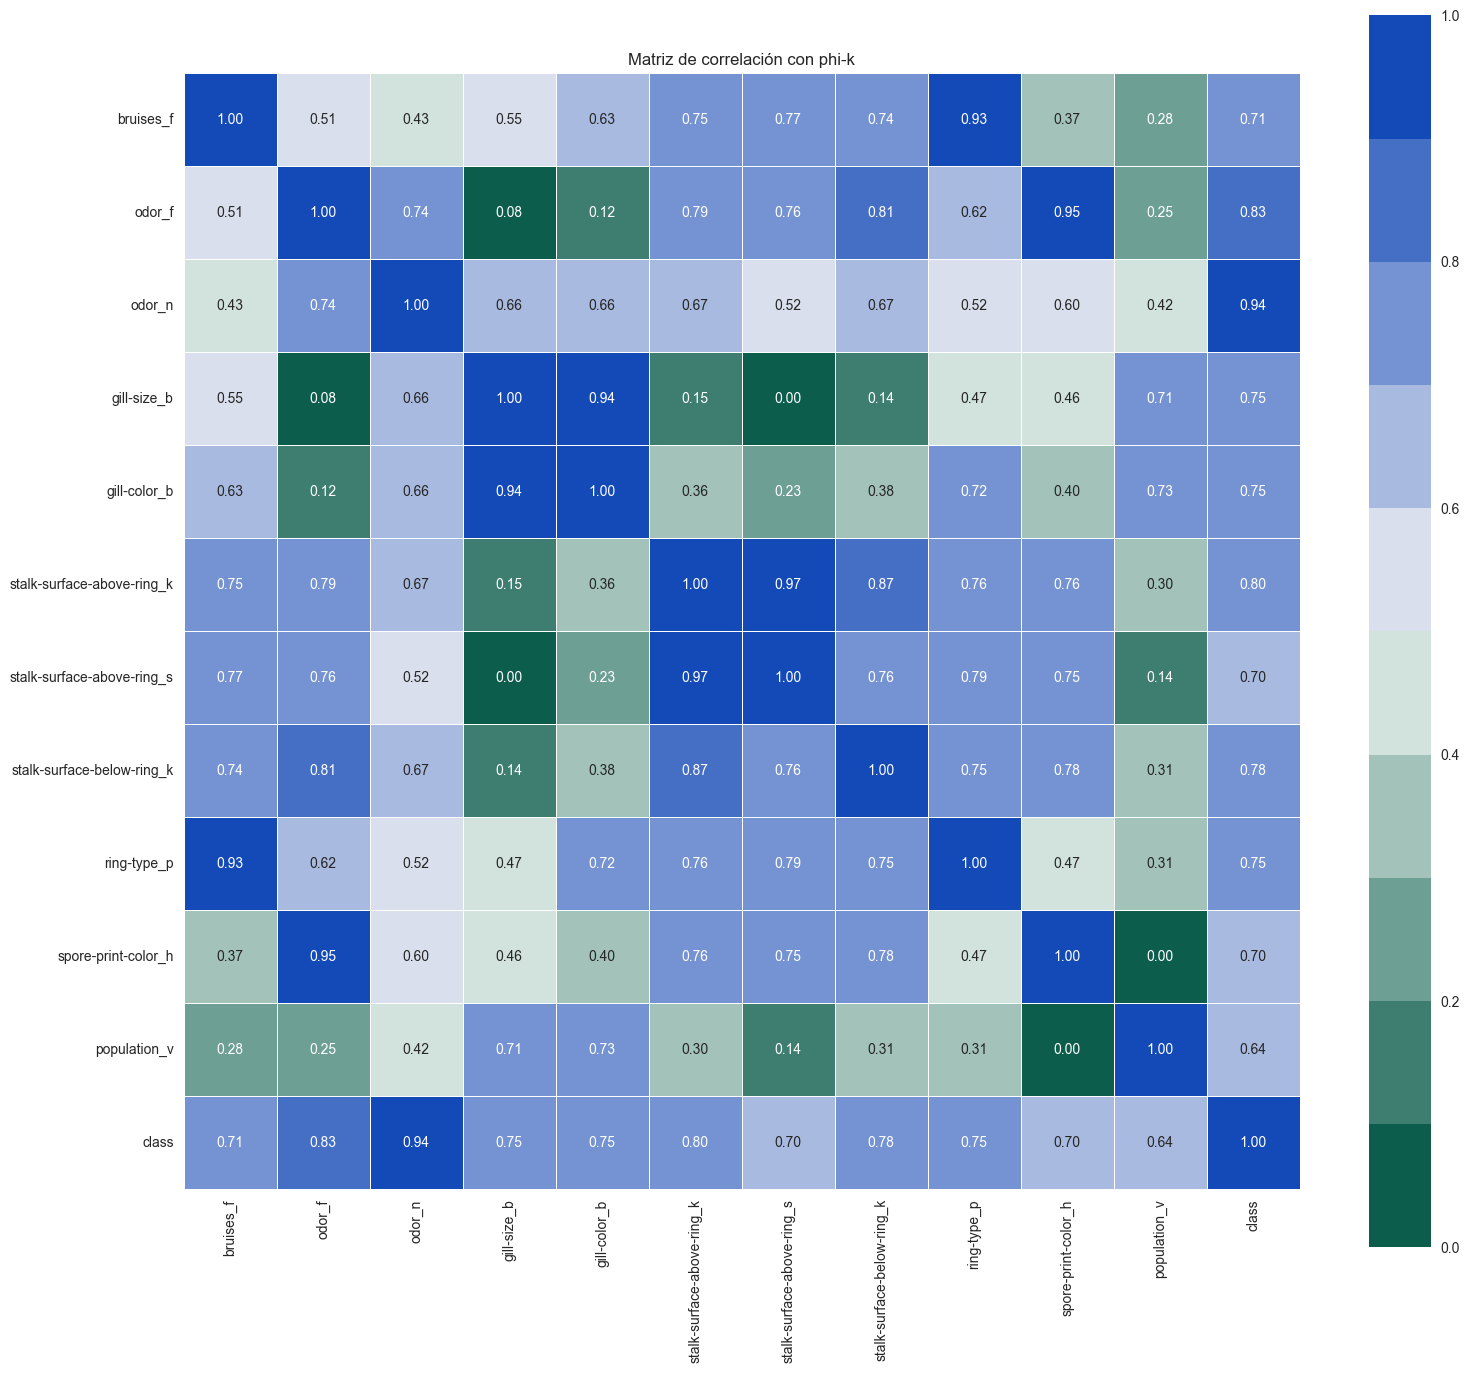

In [29]:
#Calculo la matriz de correlación con phi-k
matriz_phik = phik_matrix(df_mushroom_corto)

plt.style.use("seaborn-v0_8")
plt.figure(figsize=(18, 16))

#Creo un mapa de calor con seaborn
sns.heatmap(matriz_phik,
            vmin = 0,
            vmax = 1,
            cmap = sns.diverging_palette(165, 260, s = 95, l = 35, n = 10),
            square = True,
            annot = True,
            linewidths = .5,
            fmt = ".2f")

#Defino el título
plt.title("Matriz de correlación con phi-k")

Represento visualmente los gráficos de barras de las features incluidas de mi DataFrame acortado.

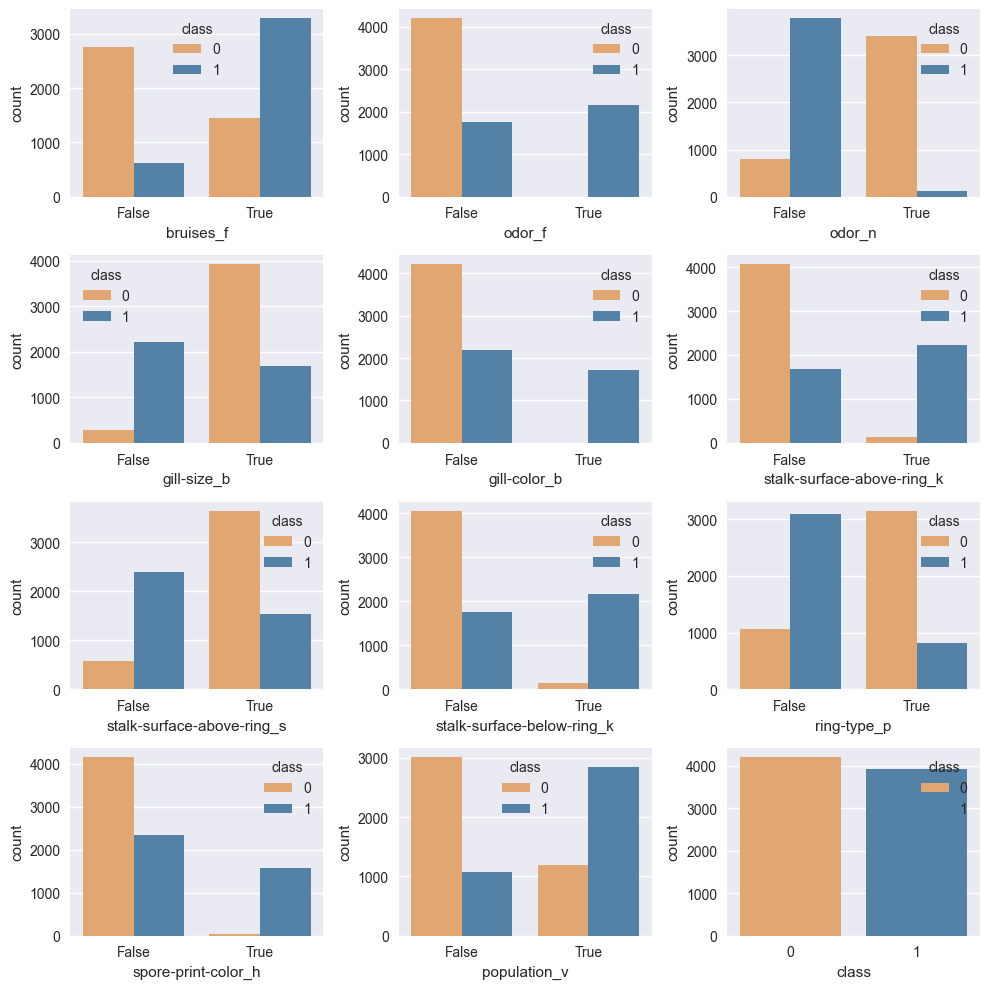

In [30]:
#Quiero 3 gráficos por fila, para que se puedan apreciar bien; y calculo
    #el número de filas necesarias para poder representarlos todos

graf_max_fila = 3
num_filas = math.ceil(len(df_mushroom_corto.columns) / graf_max_fila)

#Creo la figura y los axes
fig, axs = plt.subplots(nrows = num_filas, ncols = graf_max_fila, figsize = (10, 10))
plt.style.use('seaborn-v0_8-whitegrid')
colores = {0: 'sandybrown', 1: 'steelblue'}

#Hago un bucle para dibujar los gráficos de barras
for index, feature in enumerate(df_mushroom_corto.columns):

    #Calculo la fila y la columna donde se debe situar cada gráfico
    nfila = math.floor(index / graf_max_fila) 
    ncolumna = index % graf_max_fila

    #Defino las características de cada gráfico
    sns.countplot(data = df_mushroom_corto, x = feature, hue = 'class', ax = axs[nfila][ncolumna], palette = colores)

    #Para que me meta un espaciado entre las gráficas
    plt.tight_layout() 

#Para interpretarlo, recordemos que 0 = Setas comestibles y 1 = Setas venenosas

In [31]:
#Guardo una copia de mi DataFrame Corto, en local

df_mushroom_corto.to_csv(f'../data/df_mushroom_corto_{num_ft_seleccionadas}_ft.csv', sep=',', index=False, encoding='utf-8')